In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load Bitcoin price data
df = pd.read_csv('BTC-2020min.csv')  # Renamed file

# Convert 'Date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])  # Renamed column
df.set_index('date', inplace=True)

# Select the 'Close' price
df_close = df[['close']].copy()
df_close.rename(columns={'close': 'close'}, inplace=True) # Renamed column

# Handle missing values
df_close['close'] = df_close['close'].fillna(method='ffill').fillna(method='bfill').fillna(0)

<ipython-input-3-0fcd4bc99a8d>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_close['close'] = df_close['close'].fillna(method='ffill').fillna(method='bfill').fillna(0)


In [4]:
# Function to perform ADF test
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] < 0.05:
        print("The time series is stationary (reject the null hypothesis).")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis).")



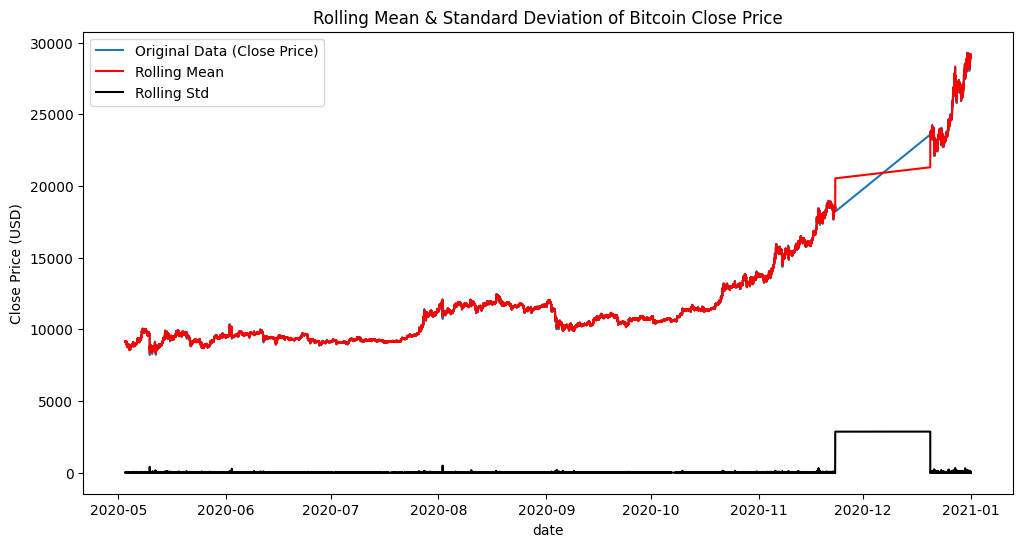

In [5]:
# Plot rolling statistics
rolling_mean = df_close['close'].rolling(window=7, center=True).mean()
rolling_std = df_close['close'].rolling(window=7, center=True).std()

plt.figure(figsize=(12, 6))
plt.plot(df_close['close'], label='Original Data (Close Price)')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean & Standard Deviation of Bitcoin Close Price')
plt.xlabel('date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()



In [ ]:
# Perform ADF test
print("\nADF Test Results:")
test_stationarity(df_close['close'])

# Aggregate to weekly data
weekly_data = df_close['close'].resample('W').mean()

# Plot aggregated weekly data
plt.figure(figsize=(12, 4))
weekly_data.plot(title='Weekly Aggregated Bitcoin Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

# Apply 7-day moving average for smoothing
df_close['smoothed'] = df_close['close'].rolling(window=7, center=True).mean()




ADF Test Results:


In [2]:
# Plot original and smoothed data
plt.figure(figsize=(12, 4))
plt.plot(df_close['close'], label='Original Daily Price')
plt.plot(df_close['smoothed'], label='7-day Moving Average', color='red')
plt.title('Smoothed Bitcoin Close Price (7-day MA)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()



NameError: name 'plt' is not defined

In [ ]:
# Detrend the time series
df_close['detrended'] = df_close['close'] - df_close['smoothed']

# Plot detrended data
plt.figure(figsize=(12, 4))
df_close['detrended'].plot(title='Detrended Bitcoin Close Price')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Detrended Price (USD)')
plt.show()